## importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading dataset

In [2]:
tumor = pd.read_csv('Brain Tumor.csv')
tumor.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [3]:
tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [4]:
tumor.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [5]:
# we have outliers in the dataset
tumor[['Image']].value_counts()

# I will drop the image column and use the rest of all columns for building the classification model

Image    
Image1       1
Image326     1
Image3249    1
Image325     1
Image3250    1
            ..
Image2130    1
Image2131    1
Image2132    1
Image2133    1
Image999     1
Name: count, Length: 3762, dtype: int64

In [6]:
# lets drop the image column, we don't need this in our classification model
tumor.drop(columns=['Image'], inplace=True)

## dataset visualization

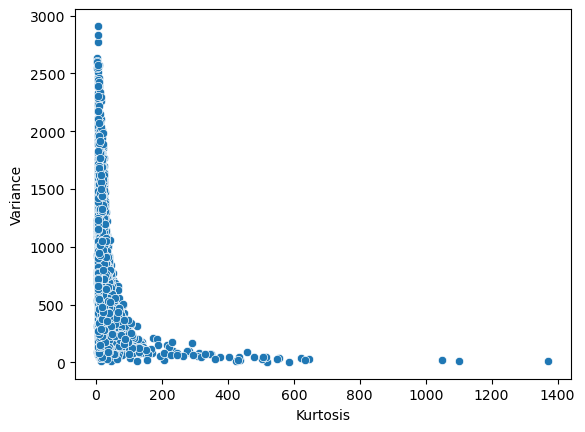

In [15]:
sns.scatterplot(y = 'Variance', x='Kurtosis', data= tumor)
plt.show()

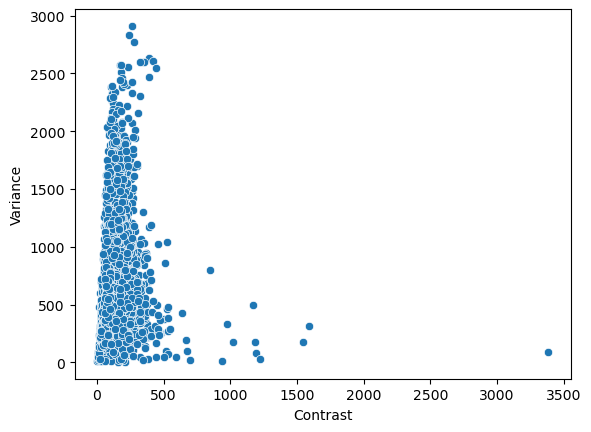

In [8]:
sns.scatterplot(x = 'Contrast', y= 'Variance', data= tumor)
plt.show()

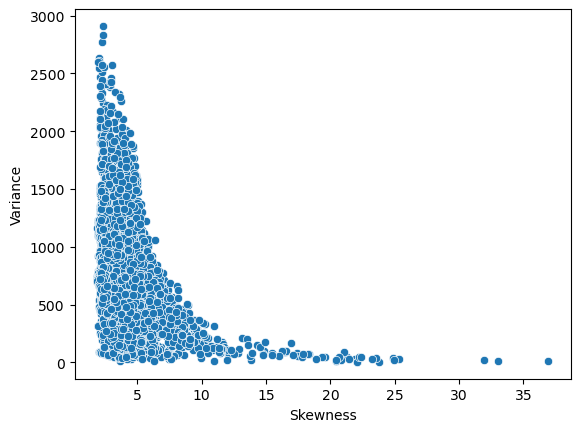

In [9]:
sns.scatterplot(x = 'Skewness', y= 'Variance', data= tumor)
plt.show()

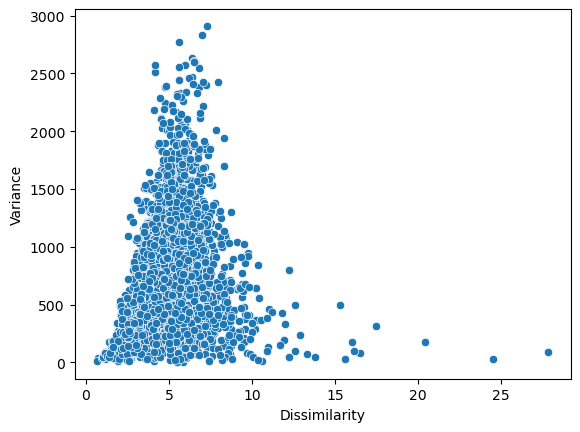

In [10]:
sns.scatterplot(x = 'Dissimilarity', y= 'Variance', data= tumor)
plt.show()

In [24]:
## we have outliers, therefore we need to apply Robust Scaling

## Pipeline

In [13]:
# lets divide the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tumor.drop(columns=['Class']), tumor['Class'], test_size= 0.2, random_state=70)

X_train.shape, X_test.shape

((3009, 13), (753, 13))

In [19]:
# lets create a column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler

tnf = ColumnTransformer(transformers=[
    ('scaler1', RobustScaler(), ['Variance', 'Skewness', 'Kurtosis', 'Contrast', 'ASM', 'Dissimilarity']),
    ('scaler2', StandardScaler(), ['Mean', 'Standard Deviation'])
], remainder='passthrough')

tnf

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler1', RobustScaler(),
                                 ['Variance', 'Skewness', 'Kurtosis',
                                  'Contrast', 'ASM', 'Dissimilarity']),
                                ('scaler2', StandardScaler(),
                                 ['Mean', 'Standard Deviation'])])

In [20]:
# lets create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('tnf', tnf),
    ('clf', LogisticRegression())
])

pipe

Pipeline(steps=[('tnf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler1', RobustScaler(),
                                                  ['Variance', 'Skewness',
                                                   'Kurtosis', 'Contrast',
                                                   'ASM', 'Dissimilarity']),
                                                 ('scaler2', StandardScaler(),
                                                  ['Mean',
                                                   'Standard Deviation'])])),
                ('clf', LogisticRegression())])

## pipeline training and predicting

In [21]:
# lets train the pipeline
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

## pipeline evaluation

In [22]:
# lets evaluate the model
from sklearn.metrics import accuracy_score, precision_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))

Accuracy:  0.9814077025232404
Precision:  0.9941860465116279


## try out some predictions

In [30]:
# lets find out some random samples from the tumor dataframe and predict its 
X = tumor.sample(5)
X

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2165,0,11.515579,544.492185,23.334356,0.116944,2.511534,6.775299,60.469243,0.304336,0.092621,0.557614,3.336456,0.971326,7.458341e-155
2803,0,14.451431,539.297212,23.222774,0.072034,2.019934,4.355635,48.345650,0.234028,0.054769,0.634105,2.194135,0.966058,7.458341e-155
3471,1,12.667908,1126.715113,33.566577,0.001599,3.269835,11.228422,150.878089,0.033316,0.001110,0.355032,6.074126,0.954546,7.458341e-155
1808,1,10.573853,1478.246962,38.447977,0.016741,4.023409,16.576836,180.767659,0.110225,0.012149,0.414323,4.949008,0.972513,7.458341e-155
3443,1,10.147919,1483.620481,38.517794,0.008505,4.296855,19.206289,109.554409,0.077962,0.006078,0.340855,5.835699,0.984190,7.458341e-155


In [33]:
# lets get the labels of the same
pipe.predict(X)

array([0, 0, 1, 1, 1], dtype=int64)